In [1]:
import pandas as pd
cols = ['brewery_name', 'beer_name','beer_style','beer_beerid', 'beer_abv','review_overall','review_taste',
       'review_aroma', 'review_appearance', 'review_palate', ]
df = pd.read_csv('beer_reviews.tar.gz',usecols=cols)

In [2]:
df = df[['brewery_name', 'beer_name','beer_style','beer_beerid', 'beer_abv','review_overall','review_taste',
       'review_aroma', 'review_appearance', 'review_palate', ]]

In [3]:
df = df.rename(columns={'beer_beerid':'beer_id','beer_abv':'abv'})

In [4]:
df.beer_style = df.beer_style.astype('category')

In [5]:
#could prob also use a 'having' type clause
def get_rid(df=df,cutoff=10):
    '''Get rid of beers with fewer than cutoff amount of reviews'''
    vc = df['beer_id'].value_counts().to_frame(name='count')
    beers_to_keep = list(vc[vc['count']>=cutoff].index)
    new = df[df.beer_id.isin(beers_to_keep)]
    return new

In [6]:
def rank(df,rank_var='review_overall'):
    ''' Rank the remaining beers by their mean overall rating '''
    rank = df.groupby(['brewery_name','beer_name']).agg({'beer_id':'count','review_aroma':'mean',
                                                     'review_overall':'mean','review_palate':'mean',
                                                     'review_taste':'mean'}).sort_values(rank_var,ascending=False)
    rank = rank.rename(columns={'abv':'num_reviews'})
    return rank

In [7]:
new = get_rid(df,cutoff=35)

In [8]:
rk = rank(df = new, rank_var='review_overall').reset_index()

In [9]:
rk = rk[['brewery_name', 'beer_name','beer_id','review_overall', 'review_taste', 'review_aroma',
        'review_palate']]

In [10]:
rk

,brewery_name,beer_name,beer_id,review_overall,review_taste,review_aroma,review_palate
0,De Struise Brouwers,Dirty Horse,39,4.820513,4.743590,4.615385,4.576923
1,Southampton Publick House,Southampton Berliner Weisse,41,4.768293,4.560976,4.353659,4.390244
2,Brouwerij Drie Fonteinen,Armand'4 Oude Geuze Lente (Spring),65,4.730769,4.730769,4.715385,4.669231
3,Alpine Beer Company,Hoppy Birthday,65,4.684615,4.546154,4.569231,4.361538
4,Brouwerij Drie Fonteinen,Armand'4 Oude Geuze Zomer (Summer),45,4.644444,4.600000,4.544444,4.488889
5,The Lost Abbey,Yellow Bus,46,4.641304,4.695652,4.619565,4.456522
6,Brouwerij Drie Fonteinen,Geuze Cuvée J&J (Joost En Jessie) Blauw (Blue),71,4.633803,4.570423,4.577465,4.436620
7,Kern River Brewing Company,Citra DIPA,252,4.630952,4.573413,4.690476,4.373016
8,Brasserie Cantillon,Cantillon Blåbær Lambik,156,4.628205,4.628205,4.528846,4.493590
9,The Lost Abbey,Veritas 004,83,4.626506,4.668675,4.548193,4.506024


In [11]:
def findrank(df=rk,**kwargs):
    for item in kwargs.keys():
        df = df[df[item].str.contains(kwargs[item])].sort_values('review_overall',ascending=False)
    return df

In [12]:
findrank(beer_name='Kentucky')

,brewery_name,beer_name,beer_id,review_overall,review_taste,review_aroma,review_palate
86,Founders Brewing Company,Founders KBS (Kentucky Breakfast Stout),1932,4.397516,4.626294,4.570393,4.479814
1169,Jackie O's Pub & Brewery,Kentucky Monk,35,4.057143,4.100000,4.271429,3.957143
3717,Alltech’s Lexington Brewing and Distilling Co.,Kentucky Light,37,3.756757,3.297297,3.108108,3.378378
4781,Alltech’s Lexington Brewing and Distilling Co.,Kentucky Bourbon Barrel Ale,326,3.610429,3.687117,3.802147,3.541411
5067,Alltech’s Lexington Brewing and Distilling Co.,Kentucky Ale,110,3.559091,3.295455,3.159091,3.386364


In [13]:
findrank(beer_name='Arrogant Bastard')

,brewery_name,beer_name,beer_id,review_overall,review_taste,review_aroma,review_palate
815,Stone Brewing Co.,Oaked Arrogant Bastard Ale,1670,4.109281,4.266766,4.143114,4.164371
1032,Stone Brewing Co.,Arrogant Bastard Ale,2704,4.078402,4.278846,4.119268,4.143121


In [14]:
pd.options.display.max_rows = 999

In [15]:
len(rk)

6502

In [16]:
r=rk.head(100)

In [17]:
# r.to_csv('top_100.csv',index=False)

In [18]:
r

,brewery_name,beer_name,beer_id,review_overall,review_taste,review_aroma,review_palate
0,De Struise Brouwers,Dirty Horse,39,4.820513,4.743590,4.615385,4.576923
1,Southampton Publick House,Southampton Berliner Weisse,41,4.768293,4.560976,4.353659,4.390244
2,Brouwerij Drie Fonteinen,Armand'4 Oude Geuze Lente (Spring),65,4.730769,4.730769,4.715385,4.669231
3,Alpine Beer Company,Hoppy Birthday,65,4.684615,4.546154,4.569231,4.361538
4,Brouwerij Drie Fonteinen,Armand'4 Oude Geuze Zomer (Summer),45,4.644444,4.600000,4.544444,4.488889
5,The Lost Abbey,Yellow Bus,46,4.641304,4.695652,4.619565,4.456522
6,Brouwerij Drie Fonteinen,Geuze Cuvée J&J (Joost En Jessie) Blauw (Blue),71,4.633803,4.570423,4.577465,4.436620
7,Kern River Brewing Company,Citra DIPA,252,4.630952,4.573413,4.690476,4.373016
8,Brasserie Cantillon,Cantillon Blåbær Lambik,156,4.628205,4.628205,4.528846,4.493590
9,The Lost Abbey,Veritas 004,83,4.626506,4.668675,4.548193,4.506024


In [19]:
r[['brewery_name','beer_name']]

,brewery_name,beer_name
0,De Struise Brouwers,Dirty Horse
1,Southampton Publick House,Southampton Berliner Weisse
2,Brouwerij Drie Fonteinen,Armand'4 Oude Geuze Lente (Spring)
3,Alpine Beer Company,Hoppy Birthday
4,Brouwerij Drie Fonteinen,Armand'4 Oude Geuze Zomer (Summer)
5,The Lost Abbey,Yellow Bus
6,Brouwerij Drie Fonteinen,Geuze Cuvée J&J (Joost En Jessie) Blauw (Blue)
7,Kern River Brewing Company,Citra DIPA
8,Brasserie Cantillon,Cantillon Blåbær Lambik
9,The Lost Abbey,Veritas 004


In [34]:
r[['brewery_name','beer_name']].to_csv('beers')

In [20]:
rk.brewery_name.nunique()

1101

Idea: Rank different breweries based on their mean review_overall aggregate over beers

In [21]:
brk = rk.groupby('brewery_name').agg({'review_overall':'mean'}).sort_values('review_overall',ascending=False).reset_index()

In [22]:
brk.head(2)

,brewery_name,review_overall
0,Närke Kulturbryggeri AB,4.528394
1,Brouwerij Westvleteren (Sint-Sixtusabdij van W...,4.501430


In [23]:
def findbrk(brewery):
    return brk[brk.brewery_name.str.contains(brewery)]

In [24]:
findbrk('Founders')

,brewery_name,review_overall
115,Founders Brewing Company,4.052101


In [25]:
findbrk('Goose Island')

,brewery_name,review_overall
180,Goose Island Beer Co.,3.990859


In [26]:
findbrk('Blue Point')

,brewery_name,review_overall
469,Blue Point Brewing Company,3.803274


In [27]:
th = df[df.beer_name=='Two Hearted Ale']

In [28]:
th

,brewery_name,beer_name,beer_style,beer_id,abv,review_overall,review_taste,review_aroma,review_appearance,review_palate
929993,"Bell's Brewery, Inc.",Two Hearted Ale,American IPA,1093.0,7.0,4.0,4.0,3.5,4.0,5.0
930296,"Bell's Brewery, Inc.",Two Hearted Ale,American IPA,1093.0,7.0,4.0,4.0,4.0,4.0,3.5
930306,"Bell's Brewery, Inc.",Two Hearted Ale,American IPA,1093.0,7.0,4.0,4.5,4.5,4.5,4.0
930761,"Bell's Brewery, Inc.",Two Hearted Ale,American IPA,1093.0,7.0,4.5,5.0,4.5,4.0,4.0
930866,"Bell's Brewery, Inc.",Two Hearted Ale,American IPA,1093.0,7.0,3.5,4.5,5.0,4.0,4.0
930983,"Bell's Brewery, Inc.",Two Hearted Ale,American IPA,1093.0,7.0,4.0,4.5,4.5,4.0,3.5
931111,"Bell's Brewery, Inc.",Two Hearted Ale,American IPA,1093.0,7.0,4.0,4.0,4.0,4.5,4.0
931309,"Bell's Brewery, Inc.",Two Hearted Ale,American IPA,1093.0,7.0,4.0,4.0,3.5,3.5,4.0
931360,"Bell's Brewery, Inc.",Two Hearted Ale,American IPA,1093.0,7.0,5.0,4.5,4.5,4.5,4.0
931368,"Bell's Brewery, Inc.",Two Hearted Ale,American IPA,1093.0,7.0,4.5,4.0,4.5,4.0,4.0


In [29]:
%matplotlib inline

In [30]:
thdist = th['review_overall'].value_counts(normalize=True).sort_index()

In [31]:
thdist

1.5    0.000367
2.0    0.004399
2.5    0.004765
3.0    0.021261
3.5    0.071848
4.0    0.292889
4.5    0.401393
5.0    0.203079
Name: review_overall, dtype: float64

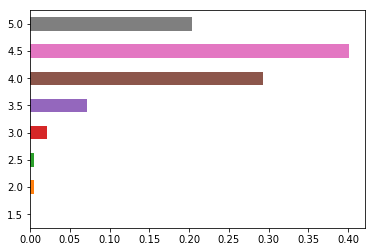

In [32]:
thdist.plot(kind='barh')